In [ ]:
# Restart runtime after executing this cell 

# TensorFlow makes the colab runtime crash due to an outdated protobuf version.
!pip uninstall -y tensorflow
!pip install -U ludwig[tree,viz] matplotlib "scikit-learn<1.2"

# Detecting credit card fraud using GBM

Welcome to this tutorial on training a GBM model for detecting credit card fraud using the creditcard_fraud Ludwig dataset!

## Load data

First, let's download the dataset from Kaggle. You'll need to specify your Kaggle username and Kaggle API key so that Ludwig can download the dataset via the Kaggle API. Ludwig will not store any of your credentials.



In [ ]:
import os
import getpass

os.environ["KAGGLE_USERNAME"] = input("Enter your Kaggle username:")
os.environ["KAGGLE_KEY"] = getpass.getpass("Enter your Kaggle API key:")

In [3]:
!ludwig datasets download creditcard_fraud

███████████████████████
█ █ █ █  ▜█ █ █ █ █   █
█ █ █ █ █ █ █ █ █ █ ███
█ █   █ █ █ █ █ █ █ ▌ █
█ █████ █ █ █ █ █ █ █ █
█     █  ▟█     █ █   █
███████████████████████
ludwig v0.6.4 - Datasets download



This command will download the [credit card fraud dataset from Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).

The creditcard_fraud dataset contains over 284K records with 31 features and a binary label indicating whether a transaction was fraudulent or not.

In [ ]:
from ludwig.benchmarking.utils import load_from_module
from ludwig.datasets import creditcard_fraud

df = load_from_module(creditcard_fraud, {'name': 'Class', 'type': 'binary'})

This will load the dataset into a Pandas DataFrame and add a reproducible train/valid/test split, stratified on the output feature.

In [34]:
df.groupby('split').Class.value_counts()

split  Class
0      0        178180
       1           349
1      0         19802
       1            34
2      0         86333
       1           109
Name: Class, dtype: int64

## Training

Next, let's create a Ludwig configuration to define our machine learning task. In this configuration, we will specify that we want to use a GBM model for training. We will also specify the input and output features and set some hyperparameters for the model. For more details about the available trainer parameters, see the [documentation](https://ludwig.ai/latest/configuration/trainer/).

In [18]:
import yaml

config = yaml.safe_load(
"""
model_type: gbm

input_features:
  - name: Time
    type: number
  - name: V1
    type: number
  - name: V2
    type: number
  - name: V3
    type: number
  - name: V4
    type: number
  - name: V5
    type: number
  - name: V6
    type: number
  - name: V7
    type: number
  - name: V8
    type: number
  - name: V9
    type: number
  - name: V10
    type: number
  - name: V11
    type: number
  - name: V12
    type: number
  - name: V13
    type: number
  - name: V14
    type: number
  - name: V15
    type: number
  - name: V16
    type: number
  - name: V17
    type: number
  - name: V18
    type: number
  - name: V19
    type: number
  - name: V20
    type: number
  - name: V21
    type: number
  - name: V22
    type: number
  - name: V23
    type: number
  - name: V24
    type: number
  - name: V25
    type: number
  - name: V26
    type: number
  - name: V27
    type: number
  - name: V28
    type: number
  - name: Amount
    type: number

output_features:
  - name: Class
    type: binary

trainer:
  num_boost_round: 300
  lambda_l1: 0.00011379587942715957
  lambda_l2: 8.286477350867434
  bagging_fraction: 0.4868130193152093
  feature_fraction: 0.462444410839139
  evaluate_training_set: false
"""
)

Now that we have our data and configuration set up, we can train our GBM model using the following command:

In [19]:
import logging
from ludwig.api import LudwigModel

model = LudwigModel(config, logging_level=logging.INFO)
train_stats, preprocessed_data, output_directory = model.train(df)

/usr/local/lib/python3.8/dist-packages/ludwig/utils/dataset_utils.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["split"] = TEST_SPLIT
INFO:ludwig.utils.print_utils:
INFO:ludwig.utils.print_utils:╒════════════════════════╕
INFO:ludwig.utils.print_utils:│ EXPERIMENT DESCRIPTION │
INFO:ludwig.utils.print_utils:╘════════════════════════╛
INFO:ludwig.utils.print_utils:
INFO:ludwig.api:╒══════════════════╤═════════════════════════════════════════════════════════════════════════════════════════╕
│ Experiment name  │ api_experiment                                                                          │
├──────────────────┼─────────────────────────────────────────────────────────────────────────────────────────┤
│ Model name       │ run 


Training:   0%|          | 0/300 [00:00<?, ?it/s][LightGBM] [Warning] lambda_l1 is set=0.00011379587942715957, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011379587942715957
[LightGBM] [Warning] feature_fraction is set=0.462444410839139, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.462444410839139
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=315, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=315
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.001, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.03, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.03
[LightGBM] [Warning] lambda_l2 is set=8.286477350867434, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.286477350867434
[LightGBM] [Warning] ba

INFO:ludwig.trainers.trainer_lightgbm:
Running evaluation for step: 50, epoch: 0


Evaluation test : 100%|██████████| 56/56 [00:01<00:00, 43.06it/s]

INFO:ludwig.trainers.trainer_lightgbm:╒════════════╤════════╤═══════════╤════════════╕
│ Class      │   loss │   roc_auc │   accuracy │
╞════════════╪════════╪═══════════╪════════════╡
│ train      │ 0.0037 │           │            │
├────────────┼────────┼───────────┼────────────┤
│ validation │ 0.0041 │    0.9210 │     0.9993 │
├────────────┼────────┼───────────┼────────────┤
│ test       │ 0.0037 │    0.9377 │     0.9991 │
╘════════════╧════════╧═══════════╧════════════╛
INFO:ludwig.trainers.trainer_lightgbm:╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 0.0037 │
├────────────┼────────┤
│ validation │ 0.0041 │
├────────────┼────────┤
│ test       │ 0.0037 │
╘════════════╧════════╛
INFO:ludwig.trainers.trainer_lightgbm:Validation loss on combined improved, model saved.




Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[100]	train's binary_logloss: 0.00273991	validation's binary_logloss: 0.00343076	test's binary_logloss: 0.00291259

Training:  33%|███▎      | 100/300 [00:10<00:22,  8.85it/s]

INFO:ludwig.trainers.trainer_lightgbm:
Running evaluation for step: 100, epoch: 1


Evaluation test : 100%|██████████| 56/56 [00:02<00:00, 26.01it/s]

INFO:ludwig.trainers.trainer_lightgbm:╒════════════╤════════╤═══════════╤════════════╕
│ Class      │   loss │   roc_auc │   accuracy │
╞════════════╪════════╪═══════════╪════════════╡
│ train      │ 0.0027 │           │            │
├────────────┼────────┼───────────┼────────────┤
│ validation │ 0.0034 │    0.9210 │     0.9995 │
├────────────┼────────┼───────────┼────────────┤
│ test       │ 0.0029 │    0.9377 │     0.9994 │
╘════════════╧════════╧═══════════╧════════════╛
INFO:ludwig.trainers.trainer_lightgbm:╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 0.0027 │
├────────────┼────────┤
│ validation │ 0.0034 │
├────────────┼────────┤
│ test       │ 0.0029 │
╘════════════╧════════╛


INFO:ludwig.trainers.trainer_lightgbm:Validation loss on combined improved, model saved.



Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[150]	train's binary_logloss: 0.00230929	validation's binary_logloss: 0.00324739	test's binary_logloss: 0.00262236

Training:  50%|█████     | 150/300 [00:19<00:21,  6.94it/s]

INFO:ludwig.trainers.trainer_lightgbm:
Running evaluation for step: 150, epoch: 2


Evaluation test : 100%|██████████| 56/56 [00:03<00:00, 15.87it/s]

INFO:ludwig.trainers.trainer_lightgbm:╒════════════╤════════╤═══════════╤════════════╕
│ Class      │   loss │   roc_auc │   accuracy │
╞════════════╪════════╪═══════════╪════════════╡
│ train      │ 0.0023 │           │            │
├────────────┼────────┼───────────┼────────────┤
│ validation │ 0.0032 │    0.9210 │     0.9995 │
├────────────┼────────┼───────────┼────────────┤
│ test       │ 0.0026 │    0.9378 │     0.9995 │
╘════════════╧════════╧═══════════╧════════════╛
INFO:ludwig.trainers.trainer_lightgbm:╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 0.0023 │
├────────────┼────────┤
│ validation │ 0.0032 │
├────────────┼────────┤
│ test       │ 0.0026 │
╘════════════╧════════╛
INFO:ludwig.trainers.trainer_lightgbm:Validation loss on combined improved, model saved.




Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[200]	train's binary_logloss: 0.0020226	validation's binary_logloss: 0.00315434	test's binary_logloss: 0.0024874

Training:  67%|██████▋   | 200/300 [00:32<00:18,  5.37it/s]

INFO:ludwig.trainers.trainer_lightgbm:
Running evaluation for step: 200, epoch: 3


Evaluation test : 100%|██████████| 56/56 [00:04<00:00, 12.99it/s]

INFO:ludwig.trainers.trainer_lightgbm:╒════════════╤════════╤═══════════╤════════════╕
│ Class      │   loss │   roc_auc │   accuracy │
╞════════════╪════════╪═══════════╪════════════╡
│ train      │ 0.0020 │           │            │
├────────────┼────────┼───────────┼────────────┤
│ validation │ 0.0031 │    0.9210 │     0.9996 │
├────────────┼────────┼───────────┼────────────┤
│ test       │ 0.0025 │    0.9378 │     0.9995 │
╘════════════╧════════╧═══════════╧════════════╛
INFO:ludwig.trainers.trainer_lightgbm:╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 0.0020 │
├────────────┼────────┤
│ validation │ 0.0031 │
├────────────┼────────┤
│ test       │ 0.0025 │
╘════════════╧════════╛
INFO:ludwig.trainers.trainer_lightgbm:Validation loss on combined improved, model saved.




Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[250]	train's binary_logloss: 0.00179806	validation's binary_logloss: 0.00311817	test's binary_logloss: 0.00239345

Training:  83%|████████▎ | 250/300 [00:47<00:11,  4.38it/s]

INFO:ludwig.trainers.trainer_lightgbm:
Running evaluation for step: 250, epoch: 4


Evaluation test : 100%|██████████| 56/56 [00:06<00:00,  8.37it/s]

INFO:ludwig.trainers.trainer_lightgbm:╒════════════╤════════╤═══════════╤════════════╕
│ Class      │   loss │   roc_auc │   accuracy │
╞════════════╪════════╪═══════════╪════════════╡
│ train      │ 0.0018 │           │            │
├────────────┼────────┼───────────┼────────────┤
│ validation │ 0.0031 │    0.9210 │     0.9996 │
├────────────┼────────┼───────────┼────────────┤
│ test       │ 0.0024 │    0.9429 │     0.9995 │
╘════════════╧════════╧═══════════╧════════════╛
INFO:ludwig.trainers.trainer_lightgbm:╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 0.0018 │
├────────────┼────────┤
│ validation │ 0.0031 │
├────────────┼────────┤
│ test       │ 0.0024 │
╘════════════╧════════╛
INFO:ludwig.trainers.trainer_lightgbm:Validation loss on combined improved, model saved.




Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[300]	train's binary_logloss: 0.00160972	validation's binary_logloss: 0.00310636	test's binary_logloss: 0.00234607

Training: 100%|██████████| 300/300 [01:08<00:00,  3.42it/s]

INFO:ludwig.trainers.trainer_lightgbm:
Running evaluation for step: 300, epoch: 5


Evaluation test : 100%|██████████| 56/56 [00:07<00:00,  7.90it/s]

INFO:ludwig.trainers.trainer_lightgbm:╒════════════╤════════╤═══════════╤════════════╕
│ Class      │   loss │   roc_auc │   accuracy │
╞════════════╪════════╪═══════════╪════════════╡
│ train      │ 0.0016 │           │            │
├────────────┼────────┼───────────┼────────────┤
│ validation │ 0.0031 │    0.9211 │     0.9996 │
├────────────┼────────┼───────────┼────────────┤
│ test       │ 0.0023 │    0.9430 │     0.9995 │
╘════════════╧════════╧═══════════╧════════════╛
INFO:ludwig.trainers.trainer_lightgbm:╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 0.0016 │
├────────────┼────────┤
│ validation │ 0.0031 │
├────────────┼────────┤
│ test       │ 0.0023 │
╘════════════╧════════╛
INFO:ludwig.trainers.trainer_lightgbm:Validation loss on combined improved, model saved.




Training: 100%|██████████| 300/300 [01:20<00:00,  3.74it/s]

INFO:ludwig.utils.print_utils:
INFO:ludwig.utils.print_utils:╒═════════════════╕
INFO:ludwig.utils.print_utils:│ TRAINING REPORT │
INFO:ludwig.utils.print_utils:╘═════════════════╛
INFO:ludwig.utils.print_utils:
INFO:ludwig.api:╒══════════════════════════════╤═══════════════════════╕
│ Validation feature           │ combined              │
├──────────────────────────────┼───────────────────────┤
│ Validation metric            │ loss                  │
├──────────────────────────────┼───────────────────────┤
│ Best model step              │ 300                   │
├──────────────────────────────┼───────────────────────┤
│ Best model epoch             │ 6                     │
├──────────────────────────────┼───────────────────────┤
│ Best model's validation loss │ 0.0030890759080648422 │
├──────────────────────────────┼───────────────────────┤
│ Best model's test loss       │ 0.002332845004275441  │
╘══════════════════════════════╧═══════════════════════╛
INFO:ludwig.api:
Finished: api_

## Evaluation
Once the training is complete, we can evaluate the performance of our model using the `model.evaluate` command:

In [20]:
model.set_logging_level(logging.ERROR)

train, valid, test, metadata = preprocessed_data
evaluation_statistics, predictions, output_directory = model.evaluate(test, collect_overall_stats=True)

ROC AUC

In [21]:
evaluation_statistics['Class']["roc_auc"]

0.9429567456245422

Accuracy

In [22]:
evaluation_statistics['Class']["accuracy"]

0.9995435476303101

Precision, recall and F1

In [23]:
evaluation_statistics['Class']["overall_stats"]

{'token_accuracy': 0.9995435633656935,
 'avg_precision_macro': 0.9689512098036177,
 'avg_recall_macro': 0.8917086143188491,
 'avg_f1_score_macro': 0.9268520044110913,
 'avg_precision_micro': 0.9995435633656935,
 'avg_recall_micro': 0.9995435633656935,
 'avg_f1_score_micro': 0.9995435633656935,
 'avg_precision_weighted': 0.9995435633656935,
 'avg_recall_weighted': 0.9995435633656935,
 'avg_f1_score_weighted': 0.9995230814612599,
 'kappa_score': 0.8537058585299842}

### Visualization
In addition to evaluating the performance of our model with metrics such as accuracy, precision, and recall, it can also be helpful to visualize the results of our model. Ludwig provides several options for visualizing the results of our model, including confusion matrices and ROC curves.

In [3]:
from ludwig import visualize

We can use the `visualize.confusion_matrix` function from Ludwig to create a confusion matrix, which shows the number of true positive, true negative, false positive, and false negative predictions made by our model. To do this, we can use the following code, which will display a confusion matrix plot showing the performance of our model.

/usr/local/lib/python3.8/dist-packages/ludwig/utils/visualization_utils.py:1058: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""] + labels, rotation=45, ha="left")
/usr/local/lib/python3.8/dist-packages/ludwig/utils/visualization_utils.py:1059: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([""] + labels)


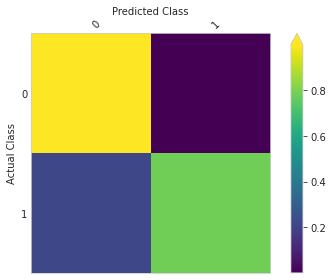

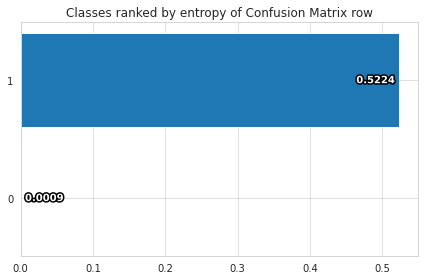

In [25]:
visualize.confusion_matrix(
    [evaluation_statistics],
    model.training_set_metadata,
    'Class',
    top_n_classes=[2],
    model_names=[''],
    normalize=True
)

We can also create an ROC curve, which plots the true positive rate against the false positive rate at different classification thresholds. To do this, we can use the following code:

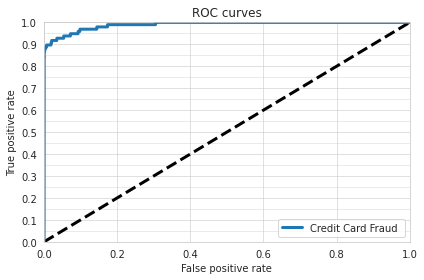

In [31]:
visualize.roc_curves(
    [predictions['Class_probabilities']],
    test.to_df()['Class_mZFLky'],
    test.to_df(),
    'Class_mZFLky',
    '1',
    model_names=["Credit Card Fraud"],
    output_directory='visualization',
    file_format='png'
)

We hope these visualizations have been helpful in understanding the performance of our GBM model for detecting credit card fraud. For more information on the various visualization options available in Ludwig, please refer to the [documentation](https://ludwig.ai/latest/user_guide/api/visualization/).



---

Thank you for following along with our tutorial on training a GBM model on the credit card fraud dataset. We hope that you found the tutorial helpful and gained a better understanding of how to use GBM models in your own machine learning projects. 

If you have any questions or feedback, please feel free to reach out to our [community](https://ludwig.ai/latest/community/)!
